## Compare with truncated SVD

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

from itertools import combinations
from statistics import mean

from implementation_of_algorithms import LowRankApproximation

In [2]:
def Truncated_svd(A, r):
    U, s, Vt = sp.linalg.svd(A)
    s[r:] = 0
    S = np.zeros(A.shape)
    np.fill_diagonal(S, s)
    return U @ S @ Vt

### Comparison of the quality of low-rank approximation using the algorithm from the article LowRankApproximation and truncated SVD

In [3]:
def plotapprox(lower, upper, step, rank):
    norms_trunc_frob = []
    norms_lowrank_frob = []
    norms_trunc_spectral = []
    norms_lowrank_spectral = []
    ind = []

    for i in range(lower, upper, step):
        ind.append(i)
        cur_trunc = []
        cur_lowrank = []
        cur_trunc_spec = []
        cur_lowrank_spec = []
        for j in range(5):
            C = np.random.randn(i, i)
            X = Truncated_svd(C, rank)
            Y = LowRankApproximation(C, rank)
            cur_trunc.append(sp.linalg.norm(X-C))
            cur_lowrank.append(sp.linalg.norm(Y-C))
            cur_trunc_spec.append(sp.linalg.norm(X-C, 2))
            cur_lowrank_spec.append(sp.linalg.norm(Y-C, 2))

        norms_trunc_frob.append(mean(cur_trunc))
        norms_lowrank_frob.append(mean(cur_lowrank))
        norms_trunc_spectral.append(mean(cur_trunc_spec))
        norms_lowrank_spectral.append(mean(cur_lowrank_spec))

    fig, ax = plt.subplots(2)
    fig.suptitle(f'Compare approximations, r = {rank}')
    ax[0].set_ylabel('Error (frobenius norm)')

    ax[0].plot(ind, norms_trunc_frob, label='truncated svd', color='r')
    ax[0].plot(ind, norms_lowrank_frob, label='our LowRankApproximation', color='g')

    ax[1].set_xlabel('Number of rows')
    ax[1].set_ylabel('Error (spectral norm)')

    ax[1].plot(ind, norms_trunc_spectral, label='truncated svd', color='r')
    ax[1].plot(ind, norms_lowrank_spectral, label='our LowRankApproximation', color='g')

    plt.legend()
    plt.show()

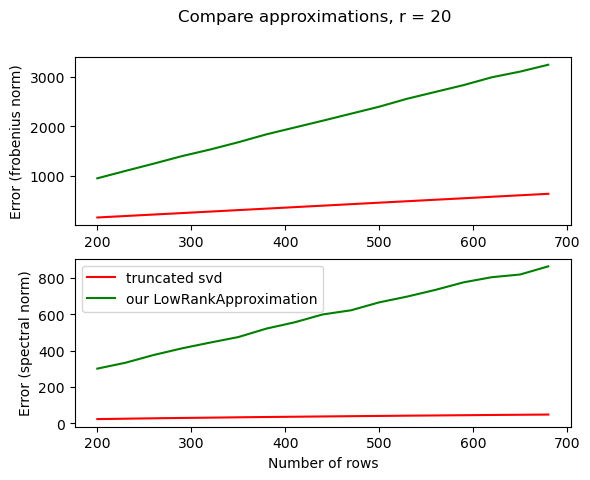

In [4]:
plotapprox(200, 700, 30, 20)

### Comparison of the running time of low-rank approximation algorithms, namely LowRankApproximation from the article and truncated SVD

In [5]:
def plottimesppr(lower, upper, step, rank):
    trunc_time = []
    lowrank_time = []
    size = []
    for i in range(lower, upper, step):
        size.append(i)
        cur_trunc_time = []
        cur_lowrank_time = []
        for j in range(5):
            C = np.random.randn(i, i)
            start1 = time.time()
            X = Truncated_svd(C, rank)
            end1 = time.time()
            cur_trunc_time.append((end1-start1) * 10 ** 3)
            start2 = time.time()
            Y = LowRankApproximation(C, rank)
            end2 = time.time()
            cur_lowrank_time.append((end2-start2) * 10 ** 3)
        trunc_time.append(mean(cur_trunc_time))
        lowrank_time.append(mean(cur_lowrank_time))

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set_xlabel('Number of rows')
    ax.set_ylabel('Time, ms')
    ax.set_title(f'Compare algorithms, rank = {rank}')

    plt.plot(size, trunc_time, label='truncated SVD', color='r')
    plt.plot(size, lowrank_time, label='Our LowRankApproximation', color='g')
    plt.legend()
    plt.show()

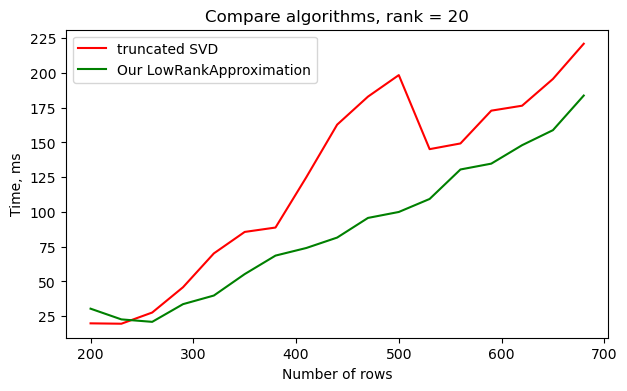

In [7]:
plottimesppr(200, 700, 30, 20)